In [74]:
import pickle
import numpy as np
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Customized DataLoader

In [76]:
from io import BytesIO
from PIL import Image
from zipfile import ZipFile

In [77]:
def extract_img_zipfile(zip_path, img_name):
    """
    args
    zip_path: zip 파일 경로 ex) './train.zip'
    img_name: zip 파일 내 이미지 파일 이름 ex) 'train/image_0.png' or ['train/image_0.png', 'train/image_1.png', ..]
    """
    with ZipFile(zip_path, 'r') as img_file:
        img_data = img_file.read(img_name)

    img_bytes_io = BytesIO(img_data)

    with Image.open(img_bytes_io) as img:
        return np.array(img)

In [78]:
file_path = "/content/drive/MyDrive/deep_stat/project/PBL.zip"
img_name = "train/image_1.png"
tmp = extract_img_zipfile(file_path, img_name)
print(tmp)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [79]:
class custom_train_dataset(Dataset):
    def __init__(self, data_dir, train=True, transform=None):

        self.data_dir = data_dir

        if train:
            self.input_path = '.'
            self.target_path = '/train.pkl'
        else:
            self.input_path = '.'
            self.target_path = '/valid.pkl'

         # open pickle file
        with open(self.data_dir + self.target_path, 'rb') as f:
            self.data = pickle.load(f)
            self.target = np.array(self.data[['n', 'potential']])

        if transform is None:
            self.transform = torch.Tensor
        else:
            self.transform = transform

    def __len__(self):
        return len(self.target)

    def __getitem__(self, index):

        #img_name = self.data_dir + '/' + self.data.iloc[index, -1]
        img_name = self.data.iloc[index, -1]
        print(img_name)
        file_path = "/content/drive/MyDrive/deep_stat/project/PBL.zip"
        img = extract_img_zipfile(file_path, img_name)

        #with Image.open(img_name) as img_PIL:
        #    img = self.transform(np.array(img_PIL))
        label = self.transform(self.target[index])

        return img, label

In [80]:
min_batch = 64
custom_train_data = custom_train_dataset('/content/drive/MyDrive/deep_stat/project', train=True)
custom_test_data = custom_train_dataset('/content/drive/MyDrive/deep_stat/project', train=False)
train_loader = DataLoader(dataset=custom_train_data, batch_size=min_batch, shuffle=True)
test_loader = DataLoader(dataset=custom_test_data, batch_size=min_batch, shuffle=False)

In [81]:
x, y = next(iter(train_loader))
x, y

train/image_31336.png
train/image_32251.png
train/image_3665.png
train/image_7169.png
train/image_8824.png
train/image_11831.png
train/image_27212.png
train/image_2177.png
train/image_37494.png
train/image_18922.png
train/image_21724.png
train/image_38321.png
train/image_16781.png
train/image_50486.png
train/image_22040.png
train/image_39411.png
train/image_37591.png
train/image_21533.png
train/image_24012.png
train/image_50944.png
train/image_29540.png
train/image_31833.png
train/image_40619.png
train/image_43744.png
train/image_9136.png
train/image_9215.png
train/image_26038.png
train/image_24863.png
train/image_57396.png
train/image_37552.png
train/image_3786.png
train/image_28894.png
train/image_27383.png
train/image_15567.png
train/image_50175.png
train/image_26032.png
train/image_59967.png
train/image_25667.png
train/image_42454.png
train/image_17899.png
train/image_41423.png
train/image_2049.png
train/image_42923.png
train/image_50116.png
train/image_3964.png
train/image_51799.p

(tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         ...,
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0

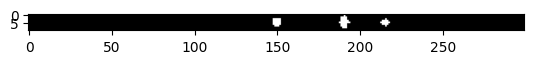

In [82]:
import matplotlib.pyplot as plt
plt.imshow(x[0], cmap='gray')
plt.show()